In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
file_name='http://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_name)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Question 1
Display the data types of each column using the function dtypes, then take a screenshot and submit it, include your code in the image.

In [4]:
df.dtypes

Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

### Question 2
Drop the columns "id" and "Unnamed: 0" from axis 1 using the method drop(), then use the method describe() to obtain a statistical summary of the data. Take a screenshot and submit it, make sure the inplace parameter is set to True

In [5]:
df.columns

Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [6]:
df.drop(["Unnamed: 0","id"],axis=1,inplace=True)

In [7]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 13
number of NaN values for the column bathrooms : 10


In [9]:
mean=df['bedrooms'].mean()
df['bedrooms'].replace(np.nan,mean, inplace=True)

In [10]:
mean=df['bathrooms'].mean()
df['bathrooms'].replace(np.nan,mean, inplace=True)

In [11]:
print("number of NaN values for the column bedrooms :", df['bedrooms'].isnull().sum())
print("number of NaN values for the column bathrooms :", df['bathrooms'].isnull().sum())

number of NaN values for the column bedrooms : 0
number of NaN values for the column bathrooms : 0


### Questions 3
Use the method value_counts to count the number of houses with unique floor values, use the method .to_frame() to convert it to a dataframe.

In [12]:
df["floors"].value_counts().to_frame().reset_index().rename(columns={"index":"floors","floors":"Number of houses"})

,floors,Number of houses
0,1.0,10680
1,2.0,8241
2,1.5,1910
3,3.0,613
4,2.5,161
5,3.5,8


### Questions 4
Use the function boxplot in the seaborn library to determine whether houses with a waterfront view or without a waterfront view have more price outliers.

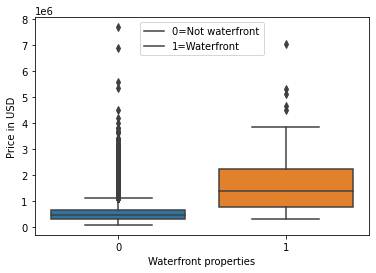

In [13]:
sns.boxplot(x="waterfront",y="price",data=df).set(xlabel="Waterfront properties",ylabel="Price in USD")
plt.legend(labels=["0=Not waterfront","1=Waterfront"])
#Not waterfront properties have more outliers.

### Question 5
Use the function regplot in the seaborn library to determine if the feature sqft_above is negatively or positively correlated with price.

<AxesSubplot:xlabel='sqft_above', ylabel='price'>

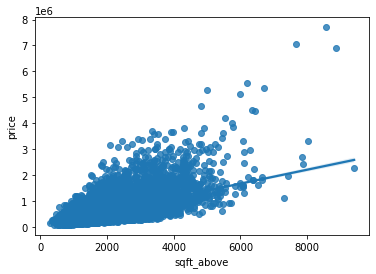

In [14]:
sns.regplot(x="sqft_above",y="price",data=df)
#Positively related

In [15]:
df.corr()['price'].sort_values()

zipcode         -0.053203
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.256794
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [16]:
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X, Y)

0.00046769430149007363

### Question 6
Fit a linear regression model to predict the 'price' using the feature 'sqft_living' then calculate the R^2. Take a screenshot of your code and the value of the R^2.

In [27]:
X = df[['sqft_living']]
Y = df[['price']]
lm = LinearRegression()
lm.fit(X,Y)
lm.score(X,Y)

0.4928532179037931

In [28]:
Yhat=lm.predict(X)

### Question 7
Fit a linear regression model to predict the 'price' using the list of features:

In [32]:
Z =df[["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]]     

In [33]:
lm.fit(Z, df['price'])

LinearRegression()

In [34]:
lm.score(Z, df['price'])

0.6576788525261241

In [35]:
Y_hat = lm.predict(Z)

### Question 8

Use the list to create a pipeline object to predict the 'price', fit the object using the features in the list <code>features</code>, and calculate the R^2.

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [55]:
Input=[('scale',StandardScaler()),('model',LinearRegression())]

In [56]:
pipe=Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [57]:
Z = Z.astype(float)
pipe.fit(Z,df['price'])

Pipeline(steps=[('scale', StandardScaler()), ('model', LinearRegression())])

In [58]:
ypipe=pipe.predict(Z)
pipe.score(Z, df['price'])

0.65769516660375

In [50]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
print("done")

done


### Question 9

Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

In [60]:
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]    
X = df[features]
Y = df['price']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.15, random_state=1)


print("number of test samples:", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples: 3242
number of training samples: 18371


In [61]:
from sklearn.linear_model import Ridge

In [63]:
RigeModel=Ridge(alpha=0.1)

In [64]:
RigeModel.fit(x_train, y_train)

Ridge(alpha=0.1)

In [68]:
RigeModel.score(x_test, y_test)

0.6478759163939112

In [69]:
RigeModel.fit(x_test, y_test)

Ridge(alpha=0.1)

In [70]:
RigeModel.score(x_test, y_test)

0.6535654800366463

### Question 10

Perform a second order polynomial transform on both the training data and testing data. Create and fit a Ridge regression object using the training data, set the regularisation parameter to 0.1, and calculate the R^2 utilising the test data provided. Take a screenshot of your code and the R^2.

In [71]:
pr=PolynomialFeatures(degree=2)

In [72]:
x_train_pr=pr.fit_transform(x_train)
x_test_pr=pr.fit_transform(x_test)

In [73]:
RigeModel=Ridge(alpha=0.1)

In [74]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=0.1)

In [75]:
RigeModel.score(x_test_pr, y_test)

0.700274429021237

In [76]:
RigeModel.fit(x_test_pr, y_test)

Ridge(alpha=0.1)

In [77]:
RigeModel.score(x_test_pr, y_test)

0.7666545737119937